In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

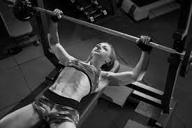

In [3]:
im = PILImage.create('bench_press.jpg')
im.thumbnail((192,192))
im

In [4]:
#|export
learn = load_learner('model.pkl')

In [5]:
#|export
categories = ('person bench pressing','person overhead pressing', 'person deadlifting', 'person lateral raising', 'person bent over row', 'person barbell squatting')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [6]:
classify_image(im)

{'person bench pressing': 0.2406989336013794,
 'person overhead pressing': 0.6591675281524658,
 'person deadlifting': 0.003008909523487091,
 'person lateral raising': 0.019873008131980896,
 'person bent over row': 0.04267449676990509,
 'person barbell squatting': 0.0345771498978138}

In [7]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['bench_press.jpg', 'deadlift.jpg', 'lateral_raise.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7f0f9e7aa0d0>,
 'http://127.0.0.1:7860/',
 None)

In [8]:
#pip install nbdev
from nbdev.export import notebook2script

In [18]:
notebook2script('app.pynb')